## k-means clustering algorithms

## This notebook contains:

### 01. Import libraries and data 
### 02. Clean and scale data
### 03. The elbow technique
### 04. k-means clustering
### 05. Visualizations and analysis
### 06. Combine cluster column with original dataset

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent'

In [4]:
df = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'rent_district_pop_merged.csv'))

In [5]:
df.shape

(257607, 39)

In [6]:
df.head()

,scoutId,regio1,baseRent,totalRent,pricetrend,livingSpace,plz,picturecount,newlyConst,yearConstructed,...,date,population,populationTrend,popTrendCat,surfaceArea,populationDensity,space/person,people/apt,districtPopTrend,districtPop
0,96107057,Nordrhein_Westfalen,595.0,840.00,4.62,86.00,44269,6,False,1965.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
1,92798563,Nordrhein_Westfalen,972.6,1320.65,3.76,87.00,44229,12,True,2018.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
2,114894763,Nordrhein_Westfalen,396.8,493.80,4.10,62.00,44137,0,False,1958.0,...,2020-02-01,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
3,90046012,Nordrhein_Westfalen,310.0,460.00,3.28,55.00,44329,14,False,1930.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
4,87928570,Nordrhein_Westfalen,301.0,NaN,4.41,30.07,44137,31,False,1979.0,...,2018-09-22,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010


# 02. Clean and scale data

In [7]:
df.columns

Index(['scoutId', 'regio1', 'baseRent', 'totalRent', 'pricetrend',
       'livingSpace', 'plz', 'picturecount', 'newlyConst', 'yearConstructed',
       'firingTypes', 'heatingType', 'hasKitchen', 'cellar', 'condition',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'balcony', 'garden',
       'baseRentRange', 'noRoomsRange', 'livingSpaceRange',
       'yearConstructedRange', 'regio2', 'regio3', 'description', 'date',
       'population', 'populationTrend', 'popTrendCat', 'surfaceArea',
       'populationDensity', 'space/person', 'people/apt', 'districtPopTrend',
       'districtPop'],
      dtype='object')

In [8]:
df[df['totalRent'] > 12000.0]

,scoutId,regio1,baseRent,totalRent,pricetrend,livingSpace,plz,picturecount,newlyConst,yearConstructed,...,date,population,populationTrend,popTrendCat,surfaceArea,populationDensity,space/person,people/apt,districtPopTrend,districtPop
22583,77264293,Nordrhein_Westfalen,12000.00,13344.00,3.45,420.00,40545,16,False,2013.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.55,619294
158263,98567656,Hessen,12000.00,13400.00,5.13,60.00,60322,2,False,1900.0,...,2019-10-08,6282348,0.17,increase,21115,298,43.52,2.16,1.09,753056
160742,114421851,Hessen,19329.00,20588.00,5.21,601.85,60322,11,False,NaN,...,2020-02-01,6282348,0.17,increase,21115,298,43.52,2.16,1.09,753056
191482,112740899,Bayern,13000.00,15000.00,4.89,269.00,80538,12,False,2016.0,...,2019-10-08,13113880,0.35,increase,70552,186,44.28,2.15,0.80,1471508
194666,107357527,Bayern,17781.12,20466.12,7.43,362.88,80539,14,False,2015.0,...,2018-09-22,13113880,0.35,increase,70552,186,44.28,2.15,0.80,1471508
240995,108319408,Berlin,12000.00,15500.00,7.69,364.00,14195,19,False,2008.0,...,2019-05-10,3659468,0.39,increase,892,4103,38.66,1.85,1.04,3644826
244876,102693974,Berlin,15000.00,15000.00,8.77,456.00,10117,27,False,2012.0,...,2018-09-22,3659468,0.39,increase,892,4103,38.66,1.85,1.04,3644826
245443,109618469,Berlin,15800.00,19600.00,8.55,565.00,10117,35,False,2017.0,...,2019-05-10,3659468,0.39,increase,892,4103,38.66,1.85,1.04,3644826
245955,112710749,Berlin,20000.00,26500.00,8.28,566.00,10785,30,False,2004.0,...,2019-10-08,3659468,0.39,increase,892,4103,38.66,1.85,1.04,3644826
246198,105015584,Berlin,12000.00,13000.00,8.70,300.00,10179,14,False,1998.0,...,2018-09-22,3659468,0.39,increase,892,4103,38.66,1.85,1.04,3644826


In [10]:
# Create a subset with only numerical variables of interest
df_sub = df[['totalRent', 'price/unit', 'livingSpace', 'picturecount', 'yearConstructed', 'noRooms', 'population',
       'populationTrend', 'populationDensity', 'districtPopTrend', 'districtPop']]

In [11]:
df_sub.shape

(257607, 11)

In [12]:
df_sub.isnull().sum()

totalRent            39303
price/unit           39356
livingSpace             70
picturecount             0
yearConstructed      54395
noRooms                  0
population               0
populationTrend          0
populationDensity        0
districtPopTrend         0
districtPop              0
dtype: int64

In [13]:
# drop blank values 
df_trim = df_sub.dropna(inplace=False)

In [14]:
df_trim.isnull().sum()

totalRent            0
price/unit           0
livingSpace          0
picturecount         0
yearConstructed      0
noRooms              0
population           0
populationTrend      0
populationDensity    0
districtPopTrend     0
districtPop          0
dtype: int64

In [15]:
df_trim.shape

(171371, 11)

In [16]:
df_trim[df_trim['totalRent']> 10000.0]

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop
22583,13344.00,31.771429,420.00,16,2013.0,8.0,17935147,-0.02,526,0.55,619294
158263,13400.00,223.333333,60.00,2,1900.0,15.0,6282348,0.17,298,1.09,753056
191482,15000.00,55.762082,269.00,12,2016.0,6.0,13113880,0.35,186,0.80,1471508
192086,12000.00,28.103044,427.00,17,2015.0,7.0,13113880,0.35,186,0.80,1471508
192362,11480.00,48.520710,236.60,14,2019.0,5.5,13113880,0.35,186,0.80,1471508
194666,20466.12,56.399140,362.88,14,2015.0,5.0,13113880,0.35,186,0.80,1471508
212688,11900.00,57.468489,207.07,20,2018.0,5.0,1846970,0.36,2446,0.90,1841179
240995,15500.00,42.582418,364.00,19,2008.0,4.0,3659468,0.39,4103,1.04,3644826
244876,15000.00,32.894737,456.00,27,2012.0,4.0,3659468,0.39,4103,1.04,3644826
245443,19600.00,34.690265,565.00,35,2017.0,12.0,3659468,0.39,4103,1.04,3644826


The variables need to be scaled now because the magnitude/range of them varies so widely.

In [17]:
# define standard scaler
scaler = StandardScaler()

In [18]:
# scale data 
scaled_data = scaler.fit_transform(df_trim)

In [19]:
# Scaling the data turns it into an array that you need to place into a dataframe before continuing with k-means clustering
df_scaled = pd.DataFrame(scaled_data, columns = ['totalRent', 'price/unit', 'livingSpace', 'picturecount', 'yearConstructed', 'noRooms', 
      'population', 'populationTrend', 'populationDensity', 'districtPopTrend', 'districtPop'])

In [20]:
df_scaled.head()

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop
0,-0.001903,-0.314003,0.400595,-0.615609,-0.036100,1.412732,1.552731,0.232232,0.007775,-0.275335,0.060837
1,0.818657,0.749866,0.432522,0.313741,1.168636,0.379330,1.552731,0.232232,0.007775,-0.275335,0.060837
2,-0.592930,-0.668386,-0.365655,-1.544959,-0.195217,-0.654072,1.552731,0.232232,0.007775,-0.275335,0.060837
3,-0.650633,-0.589935,-0.589145,0.623525,-0.831681,-0.654072,1.552731,0.232232,0.007775,-0.275335,0.060837
4,2.328407,0.694586,2.380076,3.411574,1.100444,0.379330,1.552731,0.232232,0.007775,-0.275335,0.060837


In [21]:
df_scaled.shape

(171371, 11)

# 03. The elbow technique

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 
# Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\jacym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jacym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jacym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jacym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jacym\anaconda3\lib\site-packages\sklearn\clust

[-1885081.000000007,
 -1518161.7259082322,
 -1235824.286302012,
 -1067780.6947841267,
 -976747.3916409928,
 -913210.7255326442,
 -864200.3658850754,
 -818726.7486641036,
 -781552.8955583812]

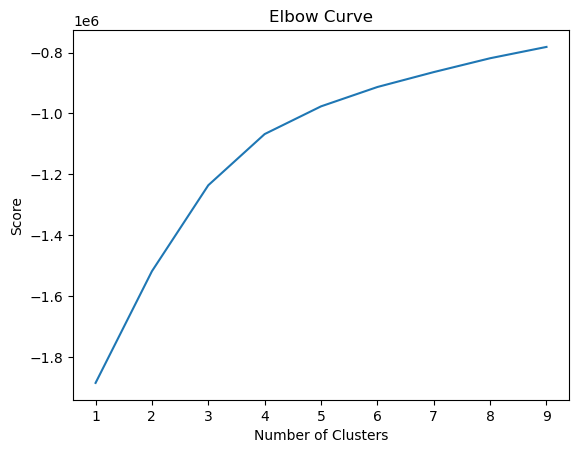

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The curve straightens out after five, so let's go with five clusters. 

# 04. k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\jacym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [27]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\jacym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df_scaled.head()

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop,clusters
0,-0.001903,-0.314003,0.400595,-0.615609,-0.036100,1.412732,1.552731,0.232232,0.007775,-0.275335,0.060837,3
1,0.818657,0.749866,0.432522,0.313741,1.168636,0.379330,1.552731,0.232232,0.007775,-0.275335,0.060837,3
2,-0.592930,-0.668386,-0.365655,-1.544959,-0.195217,-0.654072,1.552731,0.232232,0.007775,-0.275335,0.060837,3
3,-0.650633,-0.589935,-0.589145,0.623525,-0.831681,-0.654072,1.552731,0.232232,0.007775,-0.275335,0.060837,3
4,2.328407,0.694586,2.380076,3.411574,1.100444,0.379330,1.552731,0.232232,0.007775,-0.275335,0.060837,1


In [29]:
# View the number of listings per cluster
df_scaled['clusters'].value_counts()

2    48285
0    42049
3    41776
1    28235
4    11026
Name: clusters, dtype: int64

Cluster 0 is the largest, followed by clusters 4 and 1. Cluster 2 is noticeably smaller, and cluster 3 is the smallest.

Now, it's time to visualize some of the relationships I'm interested to better understand the clusters and see if the explain some of the variability in these relationships.

# 05. Visualizations and analysis

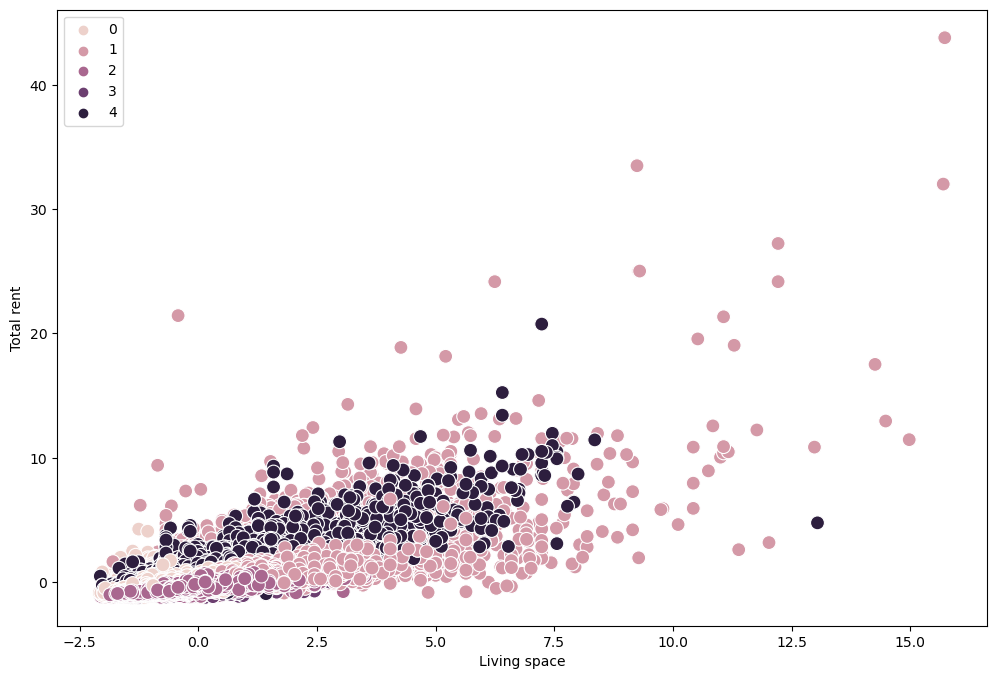

In [30]:
# Plot the clusters for the "livingSpace" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['livingSpace'], y=df_scaled['totalRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living space') # Label x-axis.
plt.ylabel('Total rent') # Label y-axis.
plt.show()

Cluster 2 contains the largest apartments and the highest rents, but it also seems to be responsible for a lot of the variability in the living space/total rent relationship. Cluster 0 has a slight positive relationship between living space and rent with less variability. Clusters 3 and 4 seem to have a stronger, positive relationship with less variability.

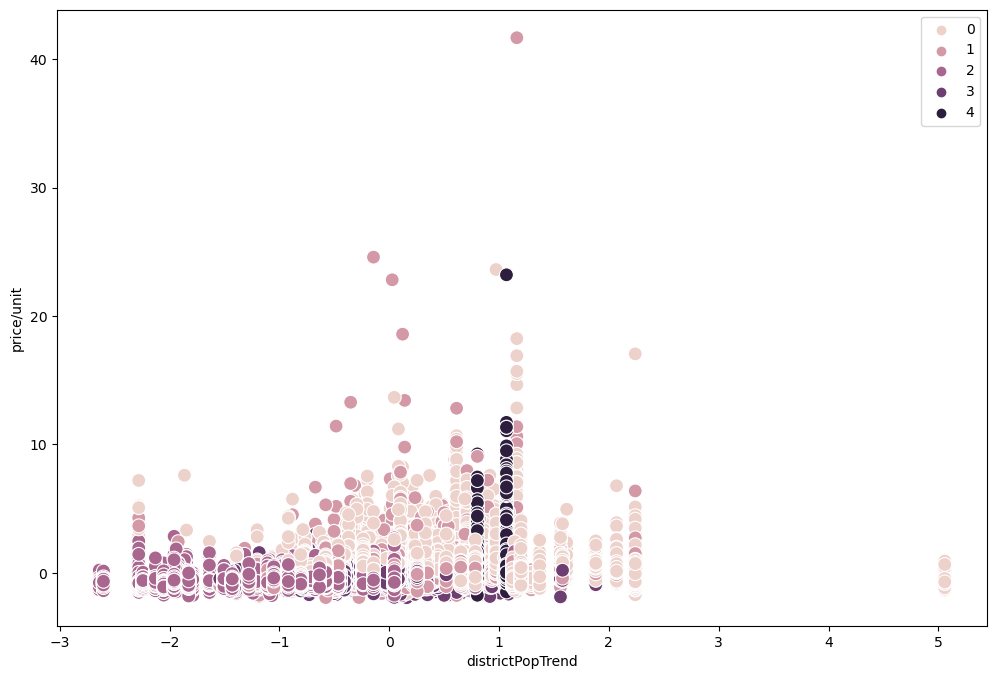

In [33]:
# Plot the clusters for the "districtPopTrend" and "price/unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['districtPopTrend'], y=df_scaled['price/unit'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('districtPopTrend') 
plt.ylabel('price/unit') 
plt.show()


#### This relationship is harder to visualize because of the relatively small number of possible values for district population trend (~400). I need to look at each cluster individually.

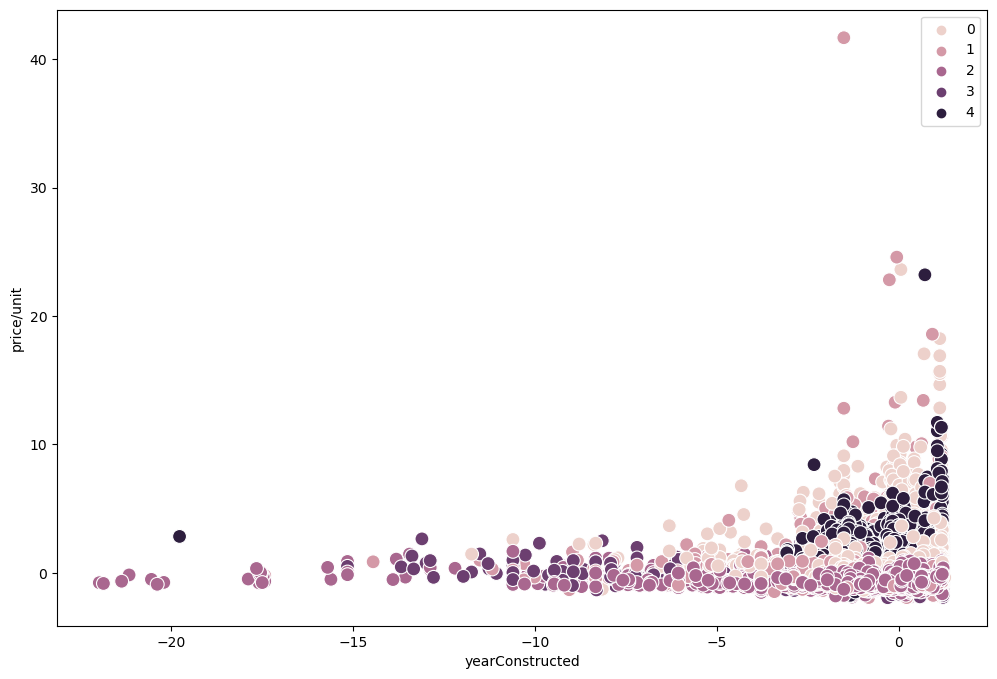

In [34]:
# Plot the clusters for the "yearConstructed" and "price/unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['yearConstructed'], y=df_scaled['price/unit'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('yearConstructed') 
plt.ylabel('price/unit') 
plt.show()


Listings in clusters 0 and 1 are cheaper but don't have a clear trend in age or age/price relationship (so these clusters do include most of the oldest units). The other clusters trend newer and tend to get more expensive as the unit is newer.

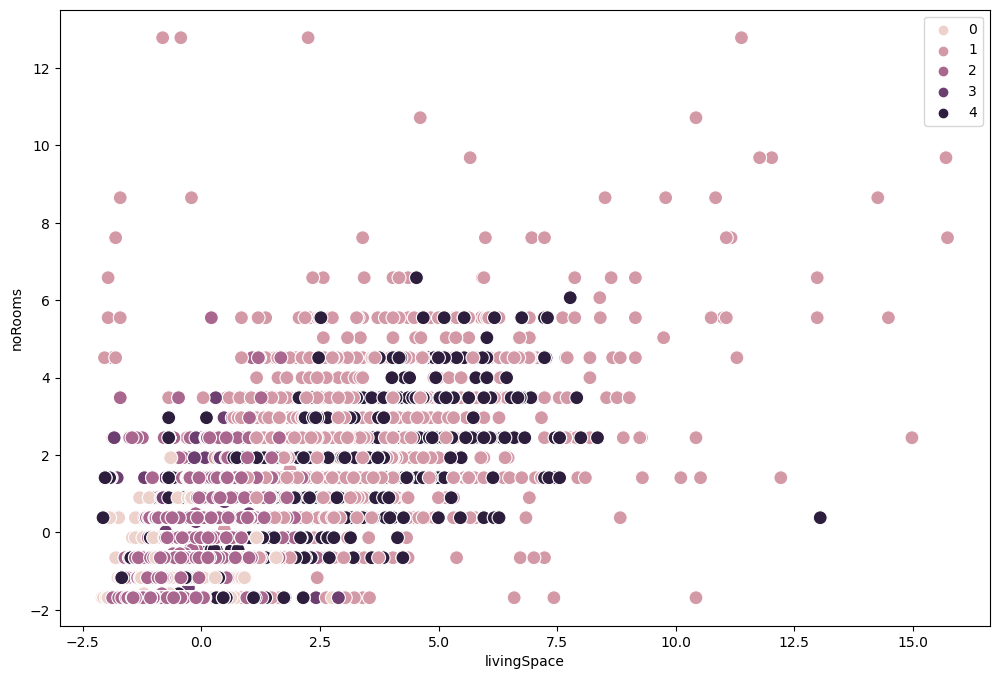

In [35]:
# Plot the clusters for the "livingSpace" and "noRooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['livingSpace'], y=df_scaled['noRooms'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('livingSpace') 
plt.ylabel('noRooms') 
plt.show()

Clusters 0 and 1 are smaller apartments with fewer rooms. Cluster 4 tends to be larger apartments (but not necessarily ones with a lot of rooms) and is responsible for the most variability.

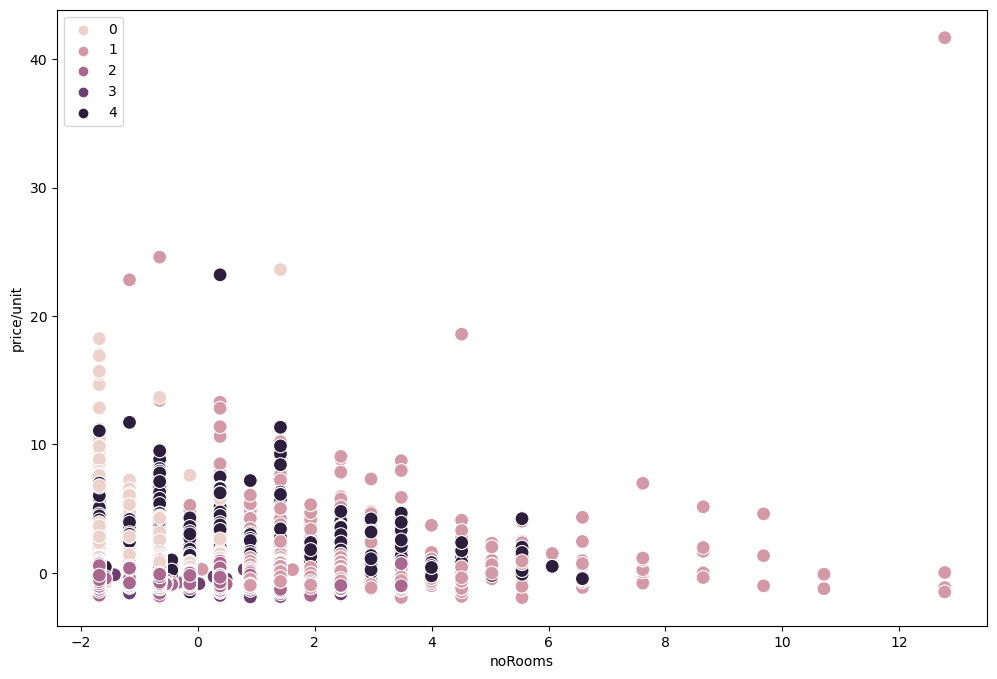

In [36]:
# Plot the clusters for the "noRooms" and "price/unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['noRooms'], y=df_scaled['price/unit'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('noRooms') 
plt.ylabel('price/unit') 
plt.show()

Clusters 0 and 1 usually have lower prices and fewer rooms. Cluster 2 apartments have higher prices and fewer rooms. Cluster 4 has higher prices and more rooms. Cluster 3 has the highest prices and fewer rooms than cluster 4 (so the units are overpriced relative to the other clusters)

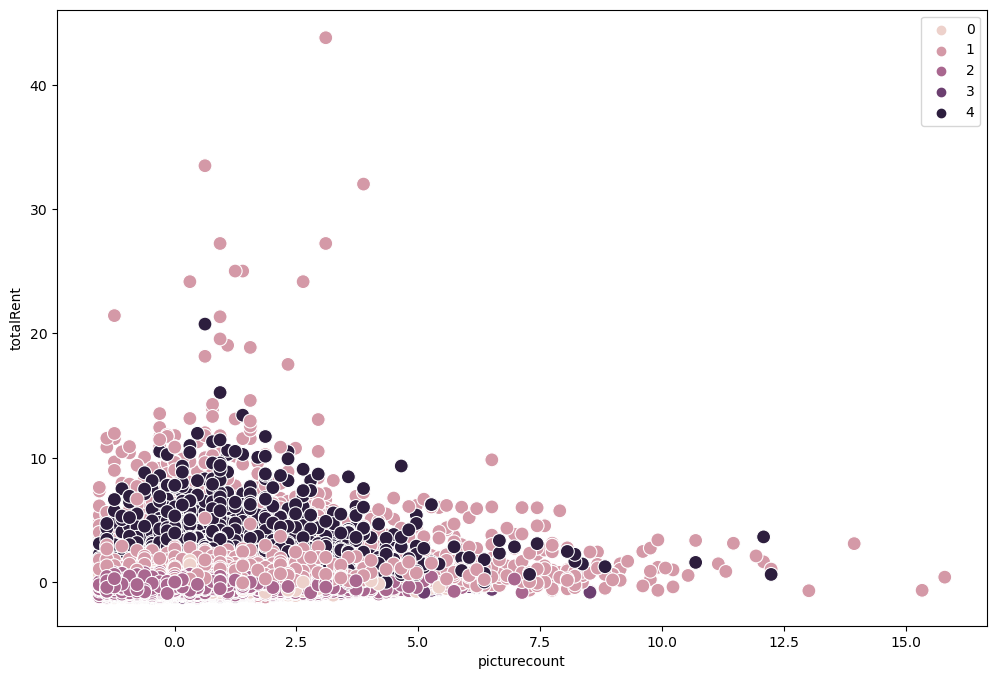

In [37]:
# Plot the clusters for the "picturecount" and "total Rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['picturecount'], y=df_scaled['totalRent'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('picturecount') 
plt.ylabel('totalRent') 
plt.show()

Cluster 2 listings might have more pictures, but it's hard to discern clear patterns here.

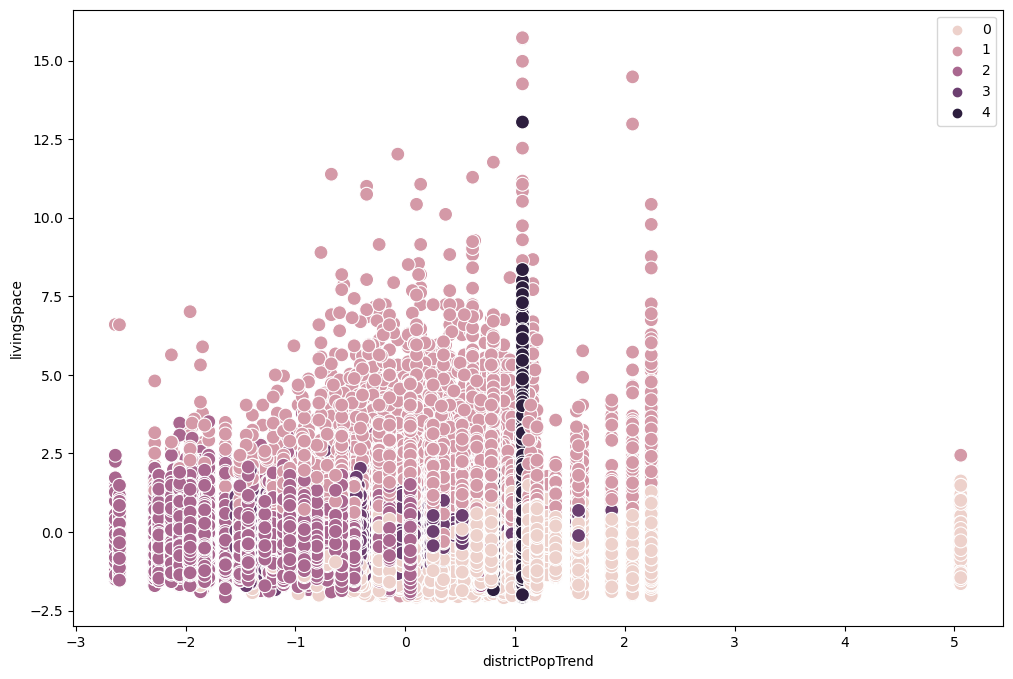

In [38]:
# Plot the clusters for the "livingSpace" and "districtPopTrend" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['districtPopTrend'], y=df_scaled['livingSpace'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('districtPopTrend') 
plt.ylabel('livingSpace') 
plt.show()

Clusters don't illuminate much about this relationship.

In [ ]:
# label clusters
# I came up with these names after studying the clusters' descriptive statistics and geographic distribution 
# (see "Geographic cluster analysis" notebook). Inserting the names here so they'll appear in my exported dataset.

df_scaled.loc[df_scaled['clusters'] == 4, 'cluster'] = 'bigcity'
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'midlow'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'budget'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'upscale'
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'midhigh'

In [67]:
df_scaled.head()

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop,clusters,cluster
0,-0.001903,-0.314003,0.400595,-0.615609,-0.036100,1.412732,1.552731,0.232232,0.007775,-0.275335,0.060837,3,midlow
1,0.818657,0.749866,0.432522,0.313741,1.168636,0.379330,1.552731,0.232232,0.007775,-0.275335,0.060837,3,midlow
2,-0.592930,-0.668386,-0.365655,-1.544959,-0.195217,-0.654072,1.552731,0.232232,0.007775,-0.275335,0.060837,3,midlow
3,-0.650633,-0.589935,-0.589145,0.623525,-0.831681,-0.654072,1.552731,0.232232,0.007775,-0.275335,0.060837,3,midlow
4,2.328407,0.694586,2.380076,3.411574,1.100444,0.379330,1.552731,0.232232,0.007775,-0.275335,0.060837,1,upscale


In [68]:
pd.set_option('display.max_columns', 50)

In [69]:
# view descriptive stats for each cluster
df_scaled.groupby('cluster').agg({'totalRent':['mean', 'median'], 
                         'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                           'noRooms':['mean', 'median'],
                           'population':['mean', 'median'],
                           'populationTrend':['mean', 'median'],
                           'populationDensity':['mean', 'median'],
                            'districtPopTrend':['mean', 'median']})

totalRent           price/unit           yearConstructed            \
             mean    median       mean    median            mean    median   
cluster                                                                      
bigcity  0.879107  0.525618   1.071167  0.886313        0.065449  0.327594   
budget  -0.610214 -0.664632  -0.666295 -0.720379       -0.391822 -0.104293   
midhigh -0.144929 -0.223837   0.429266  0.124828        0.199198  0.350325   
midlow  -0.269335 -0.343340  -0.280097 -0.366571       -0.011001  0.009361   
upscale  1.314573  1.039481   0.496281  0.290352        0.364121  0.714019   

        livingSpace           picturecount             noRooms            \
               mean    median         mean    median      mean    median   
cluster                                                                    
bigcity    0.230848 -0.014457     0.217879  0.003958 -0.066637 -0.137371   
budget    -0.395622 -0.448027    -0.189149 -0.305825 -0.188997 -0.654072   
midhigh   -0.449844 -0.417696    -0.128902 -0.150934 -0.534730 -0.654072   
midlow    -0.124226 -0.142165    -0.231498 -0.305825 -0.003098  0.379330   
upscale    1.440143  1.216652     0.772870  0.623525  1.150160  1.412732   

        population           populationTrend           populationDensity  \
              mean    median            mean    median              mean   
cluster                                                                    
bigcity  -0.840180 -0.768986        1.306899  1.326233          3.609279   
budget   -0.854814 -0.954038       -1.219142 -0.861769         -0.399565   
midhigh  -0.284766 -0.342415        0.347821  0.579110         -0.277904   
midlow    1.342073  1.552731        0.357316  0.232232         -0.057028   
upscale   0.228305  0.439636        0.527842  0.739208         -0.227907   

                  districtPopTrend            
           median             mean    median  
cluster                                       
bigcity  4.062980         1.003334  1.067274  
budget  -0.398086        -0.937579 -0.880454  
midhigh -0.338000         0.756047  0.537795  
midlow   0.007775        -0.221738 -0.275335  
upscale -0.250706         0.413691  0.348695

Upscale apartments have the highest rents but also tend to be the largest in terms of rooms and living space, making them high but not the highest for price/unit. Their prices are increasing at a relatively high rate. They also tend to be the newest and have more pictures in their listings. These units are usually located in districts with moderate population growth.

Big city units have high rents, though not quite as high as the light purple group. They have the highest price per unit with the highest rate of price increase, and they are on the smaller side. They are all located in Berlin and Hamburg, Germany's two largest cities.

Budget is the largest group with the lowest rents, lowest price per unit and lowest price trend. These units tend to be on the older and smaller side. They're mostly located in places with lower and decreasing population. 

Midhigh units are moderately priced units that tend to be on the newer side. These units are the smallest in terms of living space and number of rooms. They tend to be in districts where the population is growing at a higher rate. 

Midlow apartments are lower-priced, moderately sized units on the older side. They seem to be located in areas with roughly stable population and lower density, so these units may represent average housing stock in Germany's moderately sized cities.

Overall thoughts: The clusters still contain quite a bit of variability, but they do seem to offer some insight into the relationships between rent, apartment size and population growth. It would be interesting to create scatterplots of correlations for individual clusters so I could study them in more detail.
I would also like to map the clusters to see if my guesses about location are accurate.

# 06. Combine cluster flag column with original dataset

If you needed to descale the data, this is how you would do it... but instead, I'm going to merge the cluster column with the original data by index, so no need to descale.

In [31]:
#inversed = scaler.inverse_transform(scaled_data)
#df_unscaled = pd.DataFrame(inversed, columns = ['totalRent', 'price/unit', 'pricetrend', 'livingSpace', 'picturecount', 'yearConstructed', 'noRooms', 
      'population', 'populationTrend', 'populationDensity', 'districtPopTrend'])

In [70]:
# remove only the cluster column from the data (other stuff is scaled so it won't match the original data)
df_clusters = df_scaled['cluster']

In [71]:
df_clusters.head()

0     midlow
1     midlow
2     midlow
3     midlow
4    upscale
Name: cluster, dtype: object

In [72]:
df_clusters.shape

(171371,)

In [73]:
# reset the index on the original, trimmed but pre-scaled data (same number of rows as the scaled data) so we can join by index
df_trim_reset = df_trim.reset_index(drop=True)

In [74]:
df_trim_reset.head()

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop
0,840.00,9.767442,86.0,6,1965.0,4.0,17935147,-0.02,526,0.33,587010
1,1320.65,15.179885,87.0,12,2018.0,3.0,17935147,-0.02,526,0.33,587010
2,493.80,7.964516,62.0,0,1958.0,2.0,17935147,-0.02,526,0.33,587010
3,460.00,8.363636,55.0,14,1930.0,2.0,17935147,-0.02,526,0.33,587010
4,2205.00,14.898649,148.0,32,2015.0,3.0,17935147,-0.02,526,0.33,587010


In [75]:
# join with the cluster column
df_cluster_merge = df_trim_reset.join(df_clusters)

In [76]:
df_cluster_merge.head()

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop,cluster
0,840.00,9.767442,86.0,6,1965.0,4.0,17935147,-0.02,526,0.33,587010,midlow
1,1320.65,15.179885,87.0,12,2018.0,3.0,17935147,-0.02,526,0.33,587010,midlow
2,493.80,7.964516,62.0,0,1958.0,2.0,17935147,-0.02,526,0.33,587010,midlow
3,460.00,8.363636,55.0,14,1930.0,2.0,17935147,-0.02,526,0.33,587010,midlow
4,2205.00,14.898649,148.0,32,2015.0,3.0,17935147,-0.02,526,0.33,587010,upscale


In [77]:
df_cluster_merge['cluster'].value_counts()

budget     48285
midhigh    42049
midlow     41776
upscale    28235
bigcity    11026
Name: cluster, dtype: int64

In [78]:
# Now we can view the cluster stats with their original numbers
df_cluster_merge.groupby('cluster').agg({'totalRent':['mean', 'median'], 
                         'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                           'noRooms':['mean', 'median'],
                           'districtPop':['mean', 'median'],
                           'populationTrend':['mean', 'median'],
                           'populationDensity':['mean', 'median'],
                            'districtPopTrend':['mean', 'median']})

totalRent         price/unit            yearConstructed          \
                mean  median       mean     median            mean  median   
cluster                                                                      
bigcity  1356.059561  1149.0  16.814508  15.874060     1969.467459  1981.0   
budget    483.675904   451.8   7.975155   7.700000     1949.350751  1962.0   
midhigh   756.221164   710.0  13.548828  12.000000     1975.351500  1982.0   
midlow    683.349209   640.0   9.939940   9.500000     1966.104208  1967.0   
upscale  1611.137709  1450.0  13.889768  12.842105     1982.606942  1998.0   

        livingSpace         picturecount          noRooms         \
               mean  median         mean median      mean median   
cluster                                                            
bigcity   80.683281   73.00    11.381099   10.0  2.568447    2.5   
budget    61.061406   59.42     8.753277    8.0  2.450042    2.0   
midhigh   59.363078   60.37     9.142239    9.0  2.115484    2.0   
midlow    69.561887   69.00     8.479869    8.0  2.629933    3.0   
upscale  118.560051  111.56    14.964193   14.0  3.745915    4.0   

          districtPop            populationTrend        populationDensity  \
                 mean     median            mean median              mean   
cluster                                                                     
bigcity  3.209209e+06  3644826.0        0.382754   0.39       3702.801288   
budget   2.261056e+05   239257.0       -0.563933  -0.43        166.695351   
midhigh  4.081584e+05   278342.0        0.023319   0.11        274.009679   
midlow   3.862266e+05   354382.0        0.026878  -0.02        468.839142   
upscale  4.579667e+05   309370.0        0.090786   0.17        318.110147   

                districtPopTrend         
         median             mean median  
cluster                                  
bigcity  4103.0         1.006187   1.04  
budget    168.0        -0.020209   0.01  
midhigh   221.0         0.875416   0.76  
midlow    526.0         0.358343   0.33  
upscale   298.0         0.694372   0.66

In [79]:
stats= df_cluster_merge.groupby('cluster').agg({'totalRent':['mean', 'median'], 
                         'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                           'noRooms':['mean', 'median'],
                           'districtPop':['mean', 'median'],
                           'populationTrend':['mean', 'median'],
                           'populationDensity':['mean', 'median'],
                            'districtPopTrend':['mean', 'median']})

In [80]:
stats.to_clipboard()

In [81]:
df_cluster_merge.shape

(171371, 12)

In [82]:
# There are no unique identifiers in the data, so we'll have to merge by index again.
print(df_cluster_merge.nunique())

totalRent            25135
price/unit           92665
livingSpace          11841
picturecount            88
yearConstructed        423
noRooms                 33
population              16
populationTrend         16
populationDensity       16
districtPopTrend       151
districtPop            398
cluster                  5
dtype: int64


In [83]:
# To merge by index, the two dfs need to be identical -- so we need to drop all rows with blanks in the columns 
# where we dropped blanks before scaling
df_trimmed2 = df.dropna(subset = ['totalRent', 'price/unit', 'livingSpace', 'yearConstructed'], inplace = False) 

In [84]:
# number of rows should be identical to df_cluster_merge
df_trimmed2.shape

(171371, 40)

In [85]:
df_trimmed2.columns

Index(['scoutId', 'regio1', 'baseRent', 'totalRent', 'pricetrend',
       'livingSpace', 'plz', 'picturecount', 'newlyConst', 'yearConstructed',
       'firingTypes', 'heatingType', 'hasKitchen', 'cellar', 'condition',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'balcony', 'garden',
       'baseRentRange', 'noRoomsRange', 'livingSpaceRange',
       'yearConstructedRange', 'regio2', 'regio3', 'description', 'date',
       'population', 'populationTrend', 'popTrendCat', 'surfaceArea',
       'populationDensity', 'space/person', 'people/apt', 'districtPopTrend',
       'districtPop', 'price/unit'],
      dtype='object')

In [86]:
df_trimmed3 = df_trimmed2[['scoutId', 'regio1', 'baseRent', 'plz',
       'hasKitchen', 'lift', 'typeOfFlat', 'balcony', 'garden',
       'baseRentRange', 'noRoomsRange', 'livingSpaceRange',
       'yearConstructedRange', 'regio2', 'regio3', 'description', 'date',
      'popTrendCat']]
# make a subset with just the rows we want to add for our final clustered df

In [87]:
# reset the index to ensure proper merging
df_trimmed3_reset = df_trimmed3.reset_index(drop=True)

In [88]:
df_trimmed3_reset.head()

,scoutId,regio1,baseRent,plz,hasKitchen,lift,typeOfFlat,balcony,garden,baseRentRange,noRoomsRange,livingSpaceRange,yearConstructedRange,regio2,regio3,description,date,popTrendCat
0,96107057,Nordrhein_Westfalen,595.0,44269,False,False,ground_floor,False,True,4,4,4,2.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,2019-05-10,stable
1,92798563,Nordrhein_Westfalen,972.6,44229,False,True,ground_floor,True,False,6,3,4,9.0,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,2019-05-10,stable
2,114894763,Nordrhein_Westfalen,396.8,44137,False,False,ground_floor,False,False,2,2,3,2.0,Dortmund,Innenstadt,"Wohnraum, Schlafraum, Küche, Diele und Bad",2020-02-01,stable
3,90046012,Nordrhein_Westfalen,310.0,44329,False,False,ground_floor,False,True,2,2,2,1.0,Dortmund,Derne,"Altbau, mehrfach saniert, einfache Ausstattung...",2019-05-10,stable
4,79343710,Nordrhein_Westfalen,1550.0,44229,False,True,apartment,True,False,8,3,6,8.0,Dortmund,Lücklemberg,Qi – das innovative Wohnresort an der Olpketal...,2019-05-10,stable


In [89]:
# one last join...
df_merge2 = df_cluster_merge.join(df_trimmed3_reset)

In [90]:
df_merge2.head(20)

,totalRent,price/unit,livingSpace,picturecount,yearConstructed,noRooms,population,populationTrend,populationDensity,districtPopTrend,districtPop,cluster,scoutId,regio1,baseRent,plz,hasKitchen,lift,typeOfFlat,balcony,garden,baseRentRange,noRoomsRange,livingSpaceRange,yearConstructedRange,regio2,regio3,description,date,popTrendCat
0,840.00,9.767442,86.00,6,1965.0,4.0,17935147,-0.02,526,0.33,587010,midlow,96107057,Nordrhein_Westfalen,595.00,44269,False,False,ground_floor,False,True,4,4,4,2.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,2019-05-10,stable
1,1320.65,15.179885,87.00,12,2018.0,3.0,17935147,-0.02,526,0.33,587010,midlow,92798563,Nordrhein_Westfalen,972.60,44229,False,True,ground_floor,True,False,6,3,4,9.0,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,2019-05-10,stable
2,493.80,7.964516,62.00,0,1958.0,2.0,17935147,-0.02,526,0.33,587010,midlow,114894763,Nordrhein_Westfalen,396.80,44137,False,False,ground_floor,False,False,2,2,3,2.0,Dortmund,Innenstadt,"Wohnraum, Schlafraum, Küche, Diele und Bad",2020-02-01,stable
3,460.00,8.363636,55.00,14,1930.0,2.0,17935147,-0.02,526,0.33,587010,midlow,90046012,Nordrhein_Westfalen,310.00,44329,False,False,ground_floor,False,True,2,2,2,1.0,Dortmund,Derne,"Altbau, mehrfach saniert, einfache Ausstattung...",2019-05-10,stable
4,2205.00,14.898649,148.00,32,2015.0,3.0,17935147,-0.02,526,0.33,587010,upscale,79343710,Nordrhein_Westfalen,1550.00,44229,False,True,apartment,True,False,8,3,6,8.0,Dortmund,Lücklemberg,Qi – das innovative Wohnresort an der Olpketal...,2019-05-10,stable
5,525.00,7.835821,67.00,6,1965.0,2.0,17935147,-0.02,526,0.33,587010,midlow,62267211,Nordrhein_Westfalen,440.00,44137,False,False,apartment,False,False,3,2,3,2.0,Dortmund,Innenstadt,Die Wohnung befindet sich in einem gepflegtem ...,2019-05-10,stable
6,653.75,7.691176,85.00,8,1981.0,3.5,17935147,-0.02,526,0.33,587010,midlow,113557346,Nordrhein_Westfalen,403.75,44143,False,False,apartment,True,False,3,3,4,4.0,Dortmund,Wambel,Die Wohnung liegt im zweiten Obergeschoss des ...,2020-02-01,stable
7,672.00,10.500000,64.00,5,1964.0,2.0,17935147,-0.02,526,0.33,587010,midlow,111370962,Nordrhein_Westfalen,512.00,44225,False,False,roof_storey,True,False,4,2,3,2.0,Dortmund,Barop,Schöne helle Dachgeschosswohnung mit s/w Balko...,2019-05-10,stable
8,522.09,12.198364,42.80,7,1954.0,2.5,17935147,-0.02,526,0.33,587010,midlow,107358285,Nordrhein_Westfalen,372.09,44339,False,False,ground_floor,True,False,2,2,2,2.0,Dortmund,Eving,Die Wohnung befindet sich in einem gepflegten ...,2018-09-22,stable
9,580.00,10.937205,53.03,2,1951.0,2.0,17935147,-0.02,526,0.33,587010,midlow,115284222,Nordrhein_Westfalen,419.00,44369,False,False,apartment,True,False,3,2,2,2.0,Dortmund,Huckarde,+ Barrierearm Wohlfühlen - mit einem modernen ...,2020-02-01,stable


In [91]:
df_merge2.isnull().sum()

totalRent                   0
price/unit                  0
livingSpace                 0
picturecount                0
yearConstructed             0
noRooms                     0
population                  0
populationTrend             0
populationDensity           0
districtPopTrend            0
districtPop                 0
cluster                     0
scoutId                     0
regio1                      0
baseRent                    0
plz                         0
hasKitchen                  0
lift                        0
typeOfFlat              21530
balcony                     0
garden                      0
baseRentRange               0
noRoomsRange                0
livingSpaceRange            0
yearConstructedRange        0
regio2                      0
regio3                      0
description             10547
date                        0
popTrendCat                 0
dtype: int64

In [92]:
df_merge2.shape

(171371, 30)

In [93]:
# export clustered data
df_merge2.to_csv(r'C:\Users\jacym\Desktop\Career Foundry projects\german rent\02 Data\cleaned data\clustered_data.csv', encoding = 'utf8', index=False)